## Simpson's Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definition
Simpson's rule uses a quadratic polynomial on each subinterval of a partition to approximate the function $f(x)$ and to compute the definite integral. This is an improvement over the trapezoid rule which approximate $f(x)$ by a straight line on each subinterval of a partition.\\
The formula for Simpson's rule is $$S_{N}f = \frac{\Delta}{3}\sum_{i=1}^{N/2}\left(f(x_{2i-2})+4f(x_{2i-1}+f(x_{2i})\right)$$
where $N$ is an even number of subintervals of $\left[a, b \right]$, $\Delta x =(b-a)/N$ and $x_{i}=a+i\Delta x$.

### Error Formula
We have seen that the error in a Riemann sum is inversely proportional to the size of the partition $N$ and the trapezoid rule is inversely proportional to $N^{2}$. The error formula in the theorem below shows that Simpson's rule is even better as the error is inversely proportional $N^{4}$.

**Theorem** Let $S_{N}(f)$ denote Simpson's rule $$S_{N}f = \frac{\Delta}{3}\sum_{i=1}^{N/2}\left(f(x_{2i-2})+4f(x_{2i-1}+f(x_{2i})\right)$$ where $N$ is an even number of subintervals of
$\left[a, b\right]$, $\Delta x = (b-a)/N$ and $x_{i}=a+i\Delta x$. The error bound is
$$E_{N}^{S}(f)=\left|\int_{a}^{b}f(x)dx - S_{N}(f)\right| \leq \frac{(b-a)^{5}}{180N^{4}}k_{4}$$
where $\left|f^{(4)}\right| \leq K_{4}$ for all $x \in \left[a, b\right]$.

### Implementation
Let's write a function called `simps` which takes input parameters $f, a, b$ and $N$ and returns the approximatoin $S_{N}(f)$. Furthermore, let's assign a default value $N=50$.

In [4]:
x = np.linspace(0, 1, 11)
print(x)
print(x[0:-1:2])
print(x[1::2])
print(x[2::2])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.2 0.4 0.6 0.8]
[0.1 0.3 0.5 0.7 0.9]
[0.2 0.4 0.6 0.8 1. ]


In [5]:
def simps(f, a, b, N=50):
    if N % 2 ==1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a, b, N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

Let's test our function on integrals for which we know te exact value. For example, we know $$\int_{0}^{1}3x^{2}dx=1$$

In [6]:
simps(lambda x : 3*x**2, 0, 1, 10)

1.0

Test our function again with the integral $$\int_{0}^{\pi/2}\sin{x}dx=1$$

In [7]:
simps(np.sin, 0, np.pi/2, 100)

1.000000000338236

#### Examples
##### Approximate ln(2)
Find a value $N$ which guarantees that Simpson's rule approximate $S_{N}(f)$ of the integral $$\int_{1}^{2}\frac{1}{x}dx$$
satisfies $E_{N}^{S}(f) \leq 0.0001$.
Compute $$f^{(4)} = \frac{24}{x^{5}}$$
therefore $\left| f^{(4)} \right|\leq 24$ for all $x \in \left[1, 2\right]$ and so
$$\frac{1}{180N^{4}}24\leq 0.0001 \Rightarrow \frac{20000}{15N^{4}} \leq 1 \Rightarrow \left(\frac{20000}{15}\right)^{1/4} \leq N$$
Compute

In [8]:
(20000/15)**0.25

6.042750794713537

Compute Simpson's rule with $N=8$(the smallest even integer greater than 6.04)

In [11]:
approximation = simps(lambda x: 1/x, 1, 2, 8)
print(approximation)

0.6931545306545306


Verify that $E_{N}^{S}(f) \leq 0.0001$

In [12]:
np.abs(np.log(2)-approximation)

7.350094585301115e-06

# First Order Equations

## Linear Equations
A first order differential equation is linear if it is of the form $$y^{\prime} +p(t)y =q(t)$$
for some functions $p(t)$ and $q(t)$. For example, the equation $$y^{\prime} + y =\cos{t}$$ is a first order linear equation.
Use the method of the integrating factor to compute the general solution $$y(t)=Ce^{-t} + \frac{\cos{t}+\sin{t}}{2}$$
The constant $C$ is determined by the initial value $y(0) = C +1/2$. Plot the solution $y(t)$ over the interval $0\leq t\leq 10$ for each initial value $y(0)=-3,-2, -1, 0, 1, 2, 3$.

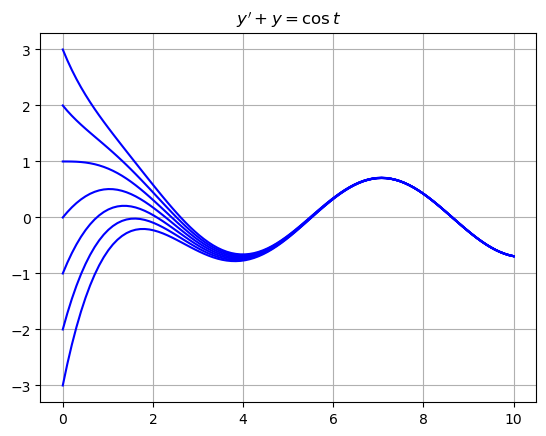

In [14]:
t = np.linspace(0, 10, 100)
for y0 in range(-3, 4):
    C = y0 - 1/2
    y = C*np.exp(-t) + (np.cos(t) + np.sin(t))/2
    plt.plot(t, y, 'b')
plt.title("$y^{\prime} + y = \cos{t}$"), plt.grid(True)
plt.show()

Notice that all solutions in this example converge to the solution $$y(t) =\frac{\cos{t}+\sin{t}}{2}$$ as $t \to \infty$.

## Separable Equations
A first order equation is separable if it is of the form $$y^{\prime} = f(t)g(y)$$ for some functions $f(t)$ and $g(y)$.
For example, the equation $$y^{\prime} = - 2ty^{2}$$ is a first order separable equation. Note that the equation is nonlinear. Use the method of separation of variables to compute the general solution $$y(t)=\frac{1}{t^{2}+C}$$
The constant $C$ is determined by the initial value $y(0) = 1/C$(except $y(t)=0$ if $y(0)=0$). Plot the solution $y(t)$ over the interval $0 \leq t \leq 5$ for each interval value $y(0)= 1, \dots, 5$.

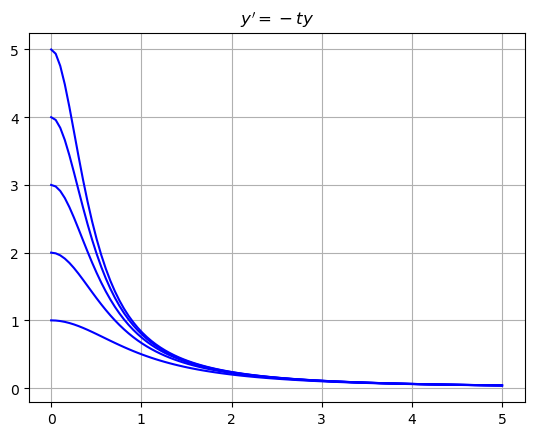

In [15]:
t = np.linspace(0, 5, 100)
for y0 in range(1, 6):
    C = 1/y0
    y = 1/(t**2 + C)
    plt.plot(t, y, 'b')
plt.title("$y^{\prime} = -ty$"), plt.grid(True)
plt.show()

Notice that all solutions in this example converge $y(t) \to 0$ as $t \to \infty$.

## Autonomous Equations
A first order equation is autonomous if it is of the form $$y^{\prime} =f(y)$$
where the right side $f(y)$ does not depend on the independent variable $t$. Note that an autonomous equation is also separable. For example, the equation $$y^{\prime}=y(1-y)$$
is a first order autonomous equation. Compute the general solution using separation of variables $$y(t)=\frac{Ce^{t}}{1+Ce^{t}}$$
The constant $C$ is determined by the initial value $y(0)=C/(1+C)$ (except $y(t)=0$ when $y(0)=1$). Plot the solution $y(t)$ over the interval $0\leq t \leq 2$ for each initial value $$y(0) = -0.1, 0.0, 0.5, 1.0, 1.5, 2.0, 3.0$$

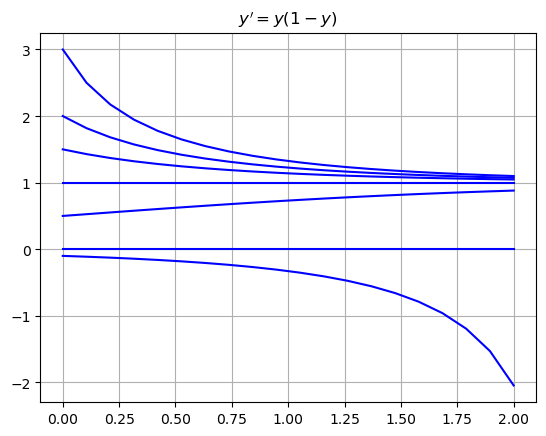

In [16]:
t = np.linspace(0, 2, 20)
for y0 in [-0.1, 0.0, 0.5, 1.5, 2.0, 3.0]:
    C = y0/(1-y0)
    y = C*np.exp(t)/(1+C*np.exp(t))
    plt.plot(t, y, 'b')
plt.plot([0,2], [1,1], 'b') # Plot constant solution y(t)=1
plt.title("$y^{\prime} = y(1-y)$"), plt.grid(True)
plt.show()

Notice that all solutions $y(t)$ with initial value $y(0) > 0$ converge $y(t) \to 1$ as $t \to \infty$. Also $y(t) =0$ for all $t$ if $y(0)=0$. Finally $y(t) \to -\infty$ as $t \to \infty$ if $y(0)<0$.

## Euler's Method
The simplest numerical method for approximating solutions of the differential equations is Euler's method. Consider a first order differential equation with an intitial condition:
$$y^{\prime} = f(t,y), y(t_{0}) =y_{0} $$
The idea behind Euler's method is:
1. Construct the equaion of the tangent line to the unknown function $y(t)$ at $t=t_{0}$: $$y = y(t_{0}) + f(t_{0},y_{0})(t-t_{0})$$ where $y^{\prime}(t_{0})=f(t_{0},y_{0})$ is the slope of $y(t)$ at t=t_{0}$.
2. Use the tangent line to approximate $y(t)$ at a small time step $t_{1}=t_{0}+h$: $$y_{1} =y_{0} + f(t_{0},y_{0})(t_1{1}-t_{0})$$ where $y_{1} \approx y(t_{1})$.
3. Repeat!

The formula for Euler's method defines a recursive sequence: $$y_{n+1}=y_{n}+f(t_{n},y_{n})(t_{n+1}-t_{n}), y_{0} = y(t_{0})$$
where $y_{n} \approx y(t_{n})$ for each $n$. If we choose equally spaced $t$ values the nthe formula becomes:
$$y_{n+1} = y_{n} + f(t_{n},y_{n})h, y_{0} =y(t_{0}), t_{n} =t_{0}+nh$$
with time step $h=t_{n+1}-t_{n}$. If we implement $N$ iterations of Euler's method from $t_{0}$ to $t_{f}$ the nthe time step is $h = \frac{t_{f}-t_{0}}{N}$$
Note two very important points about Euler's method and numerical methods in general: